#Series temporales de mediciones satelitales

Se seleccionó el dataset proveniente del satélite LIGHTSAIL-2.

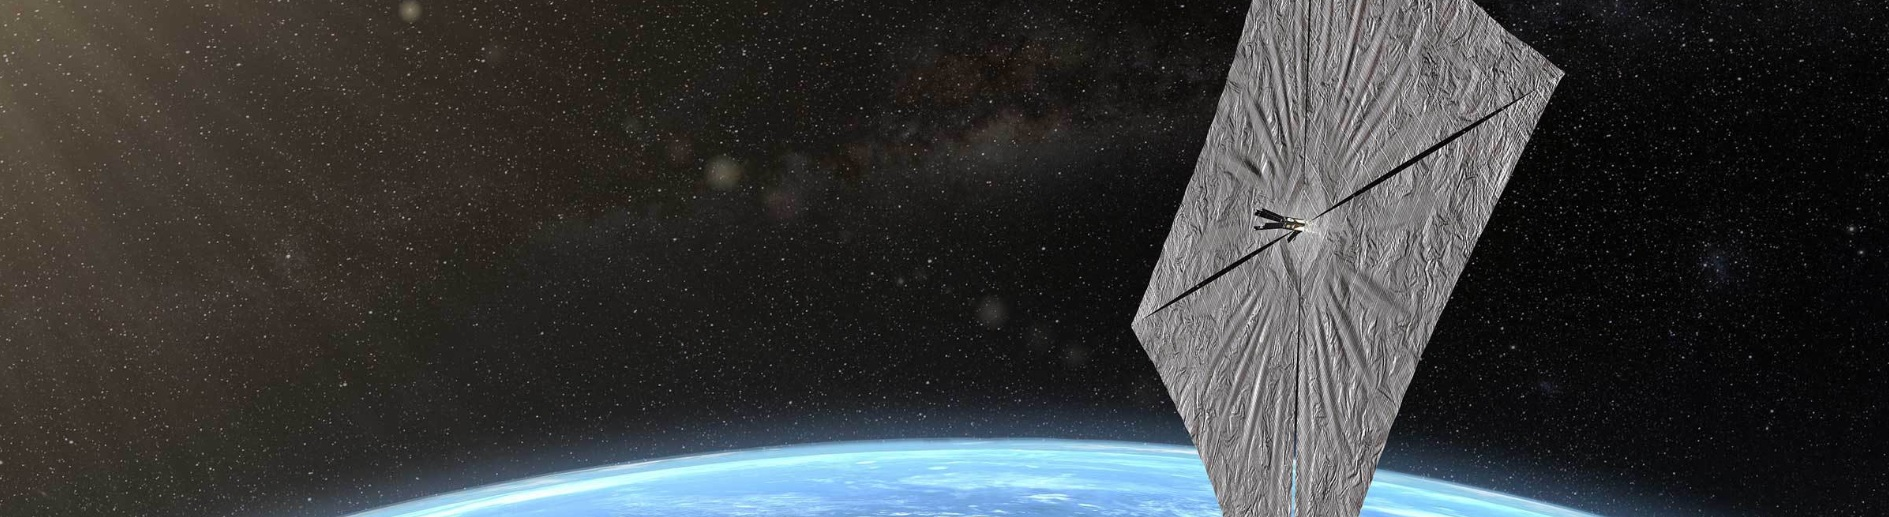

In [88]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, timezone
import pytz
import os
import gdown
import json
import matplotlib.pyplot as plt
from matplotlib import style
import statsmodels.api as sm
from pandas import DataFrame
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sbn
from IPython.display import Image
from IPython.core.display import HTML
from statsmodels.graphics import tsaplots

In [6]:
# Descargar la carpeta de dataset
if os.access('decoded_frames.json', os.F_OK) is False:
  url = 'https://drive.google.com/file/d/1luduIE_rup6zDo0OYso88nuiIpC-ogob/view?usp=sharing'
  output = 'decoded_frames.json'
  gdown.download(url, output, quiet=False, fuzzy=True)  #Agregé fuzzy=True porque estoy copiando la URL desde google drive
else:
    print("El dataset ya se encuentra descargado")

El dataset ya se encuentra descargado


In [79]:
# Descargar la imagen
if os.access('LightSail.jpg', os.F_OK) is False:
  url = 'https://drive.google.com/file/d/1t2fXdmX7L17dNnq9lcJHtCPJQU7qvaxy/view?usp=sharing'
  output = 'LighSail.jpg'
  gdown.download(url, output, quiet=False, fuzzy=True)  #Agregé fuzzy=True porque estoy copiando la URL desde google drive
else:
    print("La imagen ya se encuentra descargada")

Downloading...
From: https://drive.google.com/uc?id=1t2fXdmX7L17dNnq9lcJHtCPJQU7qvaxy
To: /content/LighSail.jpg
100%|██████████| 351k/351k [00:00<00:00, 38.0MB/s]


In [7]:
# dataset_file
text_file = "decoded_frames.json"
with open(text_file, 'r') as f:
  data = json.loads(f.read())
Dataset = pd.json_normalize(data, max_level=1)

In [8]:
Dataset.head()

,time,measurement,tags.satellite,tags.decoder,tags.station,tags.observer,tags.source,tags.version,fields.dest_callsign,fields.src_callsign,...,fields.bat6_ctlflags,fields.bat7_curr,fields.bat7_volt,fields.bat7_temp,fields.bat7_flags,fields.bat7_ctlflags,fields.comm_rxcount,fields.comm_txcount,fields.comm_rxbytes,fields.comm_txbytes
0,2019-08-10 04:47:06,,,Lightsail2,,,,1.43.1,N6CP,KK6HIT,...,2,-15,117,178,245,2,0,1548,0,650904
1,2019-08-10 06:31:15,,,Lightsail2,,,,1.43.1,N6CP,KK6HIT,...,0,0,0,0,0,0,0,1,0,272
2,2019-08-10 06:31:21,,,Lightsail2,,,,1.43.1,N6CP,KK6HIT,...,2,29,121,165,245,2,0,2,0,544
3,2019-08-10 06:32:15,,,Lightsail2,,,,1.43.1,N6CP,KK6HIT,...,2,18,119,165,245,2,0,12,0,4520
4,2019-08-10 06:32:36,,,Lightsail2,,,,1.43.1,N6CP,KK6HIT,...,2,12,118,165,245,2,0,17,0,7136


In [9]:
Dataset.tail()

,time,measurement,tags.satellite,tags.decoder,tags.station,tags.observer,tags.source,tags.version,fields.dest_callsign,fields.src_callsign,...,fields.bat6_ctlflags,fields.bat7_curr,fields.bat7_volt,fields.bat7_temp,fields.bat7_flags,fields.bat7_ctlflags,fields.comm_rxcount,fields.comm_txcount,fields.comm_rxbytes,fields.comm_txbytes
3912,2019-10-04 20:51:45,,,Lightsail2,,,,1.43.1,N6CP,KK6HIT,...,2,-15,121,199,245,2,133,10185,6003,3867045
3913,2019-10-04 20:51:52,,,Lightsail2,,,,1.43.1,N6CP,KK6HIT,...,2,-15,121,199,245,2,133,10186,6003,3867317
3914,2019-10-04 20:51:59,,,Lightsail2,,,,1.43.1,N6CP,KK6HIT,...,2,-19,121,199,245,2,133,10187,6003,3867589
3915,2019-10-04 20:52:06,,,Lightsail2,,,,1.43.1,N6CP,KK6HIT,...,2,-15,121,199,245,2,133,10188,6003,3867861
3916,2019-10-04 20:52:13,,,Lightsail2,,,,1.43.1,N6CP,KK6HIT,...,2,-16,121,199,245,2,133,10189,6003,3868133


El dataset contiene 3916 registros con 163 columnas de mediciones realizadas por el satélite, iniciando el 10/08/2019 y el último corresponde al 04/10/2019. Esto corresponde a 55 días de mediciones. Esto representa aproximadamente, casi 3 mediciones por hora.

In [10]:
Dataset['time'] = pd.to_datetime(Dataset['time'], infer_datetime_format=True)
Dataset['time'].dt.tz_localize(None)
Dataset.index = Dataset['time']
Dataset.index

DatetimeIndex(['2019-08-10 04:47:06', '2019-08-10 06:31:15',
               '2019-08-10 06:31:21', '2019-08-10 06:32:15',
               '2019-08-10 06:32:36', '2019-08-10 06:32:43',
               '2019-08-10 06:32:50', '2019-08-10 06:32:57',
               '2019-08-10 06:33:04', '2019-08-10 06:33:53',
               ...
               '2019-10-04 06:06:54', '2019-10-04 06:07:01',
               '2019-10-04 06:07:07', '2019-10-04 20:51:10',
               '2019-10-04 20:51:17', '2019-10-04 20:51:45',
               '2019-10-04 20:51:52', '2019-10-04 20:51:59',
               '2019-10-04 20:52:06', '2019-10-04 20:52:13'],
              dtype='datetime64[ns]', name='time', length=3917, freq=None)

In [11]:
diezdias = Dataset.loc['2019-08-10':'2019-08-20']
diezdias

,time,measurement,tags.satellite,tags.decoder,tags.station,tags.observer,tags.source,tags.version,fields.dest_callsign,fields.src_callsign,...,fields.bat6_ctlflags,fields.bat7_curr,fields.bat7_volt,fields.bat7_temp,fields.bat7_flags,fields.bat7_ctlflags,fields.comm_rxcount,fields.comm_txcount,fields.comm_rxbytes,fields.comm_txbytes
time,,,,,,,,,,,,,,,,,,,,,
2019-08-10 04:47:06,2019-08-10 04:47:06,,,Lightsail2,,,,1.43.1,N6CP,KK6HIT,...,2,-15,117,178,245,2,0,1548,0,650904
2019-08-10 06:31:15,2019-08-10 06:31:15,,,Lightsail2,,,,1.43.1,N6CP,KK6HIT,...,0,0,0,0,0,0,0,1,0,272
2019-08-10 06:31:21,2019-08-10 06:31:21,,,Lightsail2,,,,1.43.1,N6CP,KK6HIT,...,2,29,121,165,245,2,0,2,0,544
2019-08-10 06:32:15,2019-08-10 06:32:15,,,Lightsail2,,,,1.43.1,N6CP,KK6HIT,...,2,18,119,165,245,2,0,12,0,4520
2019-08-10 06:32:36,2019-08-10 06:32:36,,,Lightsail2,,,,1.43.1,N6CP,KK6HIT,...,2,12,118,165,245,2,0,17,0,7136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-20 23:38:24,2019-08-20 23:38:24,,,Lightsail2,,,,1.43.1,N6CP,KK6HIT,...,0,127,130,177,245,0,0,4481,0,1885768
2019-08-20 23:38:31,2019-08-20 23:38:31,,,Lightsail2,,,,1.43.1,N6CP,KK6HIT,...,0,126,131,177,245,0,0,4484,0,1887840
2019-08-20 23:38:38,2019-08-20 23:38:38,,,Lightsail2,,,,1.43.1,N6CP,KK6HIT,...,0,127,131,177,245,0,0,4485,0,1888112


In [12]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3917 entries, 2019-08-10 04:47:06 to 2019-10-04 20:52:13
Columns: 173 entries, time to fields.comm_txbytes
dtypes: datetime64[ns](1), int64(163), object(9)
memory usage: 5.3+ MB


El dataset contiene 3916 registros con 163 columnas de mediciones realizadas por el satélite, iniciando el 10/08/2019 y el último corresponde al 04/10/2019. Esto corresponde a 55 días de mediciones. Esto representa aproximadamente, casi 3 mediciones por hora.

###Selecciono como variable a estudiar  
*   fields.dauchter_atmp = Daughterboard A Temperature

In [13]:
Dataset['fields.daughter_atmp'].describe()

count    3917.000000
mean      176.429155
std        38.643296
min         0.000000
25%       152.000000
50%       172.000000
75%       202.000000
max       255.000000
Name: fields.daughter_atmp, dtype: float64

In [14]:
tot=Dataset['fields.daughter_atmp'].isnull().sum()
print("Porcentaje de Null",tot/len(Dataset['fields.daughter_atmp'])*100, '%')
tot=Dataset['fields.daughter_atmp'].isnull().values.any().sum()
print("Porcentaje de Nan",tot/len(Dataset['fields.daughter_atmp'])*100, '%') 

Porcentaje de Null 0.0 %
Porcentaje de Nan 0.0 %


No se encuentran valores Nan ni Null

In [15]:
sbn.set(rc={'figure.figsize':(15, 5)})

Text(0, 0.5, 'Temperatura')

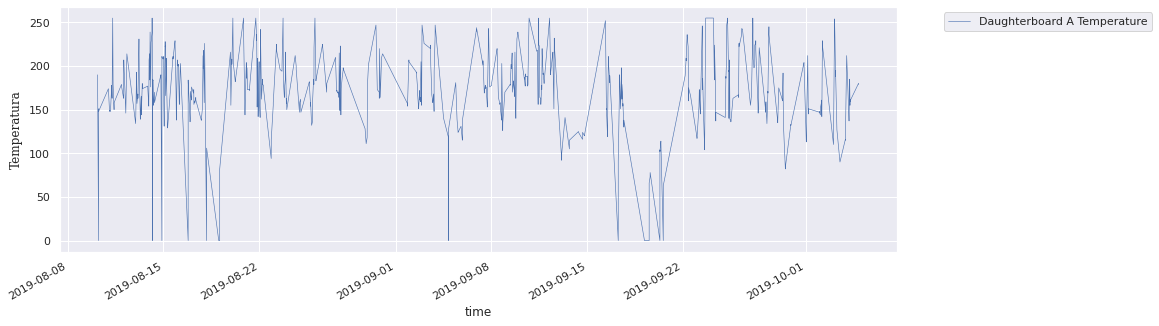

In [16]:
Dataset['fields.daughter_atmp'].plot(linewidth=0.6, label='Daughterboard A Temperature')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("Temperatura", family='serif', weight='normal', size = 12, labelpad = 6)

In [17]:
sbn.set(rc={'figure.figsize':(15, 5)})

Text(0, 0.5, 'Temperatura')

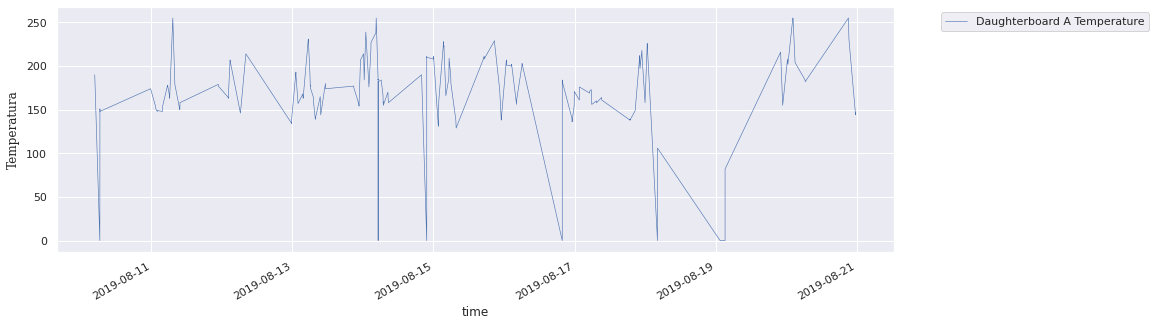

In [18]:
diezdias['fields.daughter_atmp'].plot(linewidth=0.6, label='Daughterboard A Temperature')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("Temperatura", family='serif', weight='normal', size = 12, labelpad = 6)

Observo que tengo una variable (univariable) continua, con intervalos de muestreos irregulares. Los valores máximos asienden a 255 y los mínimos a 0. Esto se debe seguramente a que el sensor de temperatura es digital con 256 niveles diferentes de temperatura, o que es analógico y el conversor es de 8 bits.

La media es de 176.42 y su desvío es de 38.64.

###Selecciono otra variable a estudiar  
*   fields.bat5_curr = Battery 5 current

In [19]:
Dataset['fields.bat5_curr'].describe()

count    3917.000000
mean        2.142711
std        34.710834
min       -79.000000
25%       -21.000000
50%        -1.000000
75%         3.000000
max       127.000000
Name: fields.bat5_curr, dtype: float64

In [20]:
tot=Dataset['fields.bat5_curr'].isnull().sum()
print("Porcentaje de Null",tot/len(Dataset['fields.bat5_curr'])*100, '%')
tot=Dataset['fields.bat5_curr'].isnull().values.any().sum()
print("Porcentaje de Nan",tot/len(Dataset['fields.bat5_curr'])*100, '%') 

Porcentaje de Null 0.0 %
Porcentaje de Nan 0.0 %


No se encuentran valores NaN ni Null

In [21]:
sbn.set(rc={'figure.figsize':(15, 5)})

Text(0, 0.5, 'Corriente')

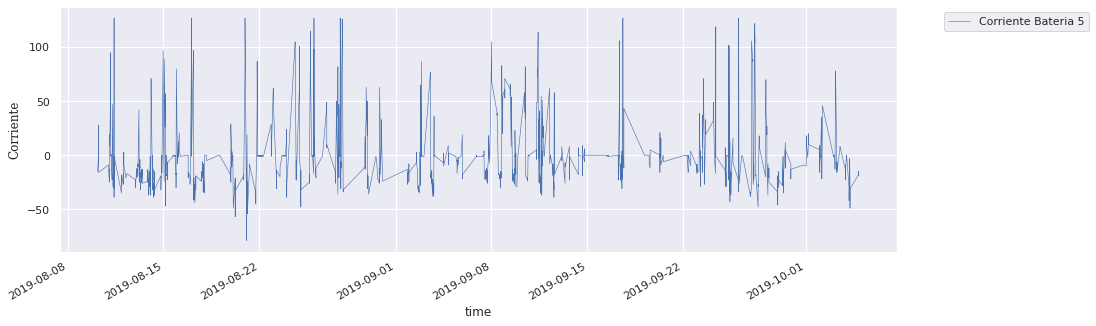

In [22]:
Dataset['fields.bat5_curr'].plot(linewidth=0.6, label='Corriente Bateria 5')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("Corriente", family='serif', weight='normal', size = 12, labelpad = 6)

In [23]:
sbn.set(rc={'figure.figsize':(15, 5)})

Text(0, 0.5, 'Corriente')

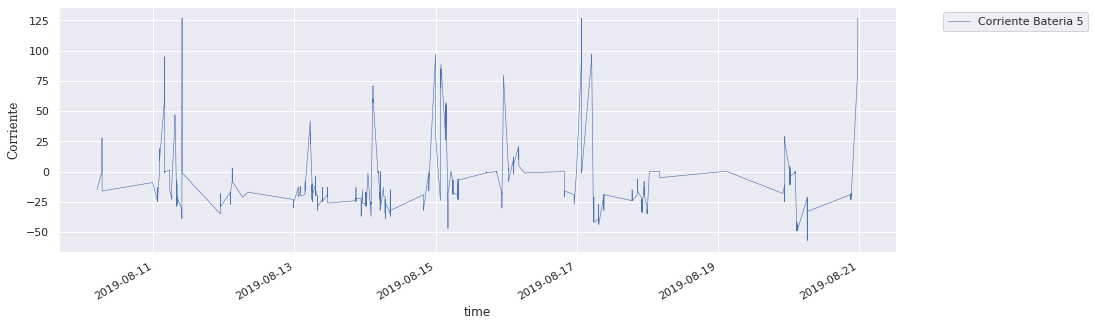

In [24]:
diezdias['fields.bat5_curr'].plot(linewidth=0.6, label='Corriente Bateria 5')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("Corriente", family='serif', weight='normal', size = 12, labelpad = 6)

Nuevamente, observo que tengo una variable (univariable) continua, con intervalos de muestreos irregulares. Los valores máximos asienden a 127 y los mínimos a -79.

La media es de 2.14 y su desvío es de 34.71.

###Analizo el estas dos variables con las muestras puntuales

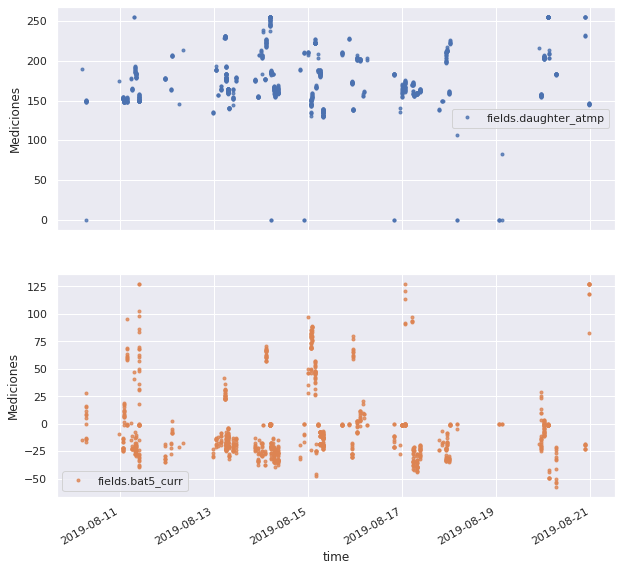

In [25]:
col_graf = ['fields.daughter_atmp', 'fields.bat5_curr'] 
ejes = diezdias[col_graf].plot(marker='.', alpha=0.8, linestyle='None',figsize=(10,10),subplots=True)
for eje in ejes:
  eje.set_ylabel('Mediciones')

In [26]:
undia = Dataset.loc['2019-08-13']#:'2019-08-12']

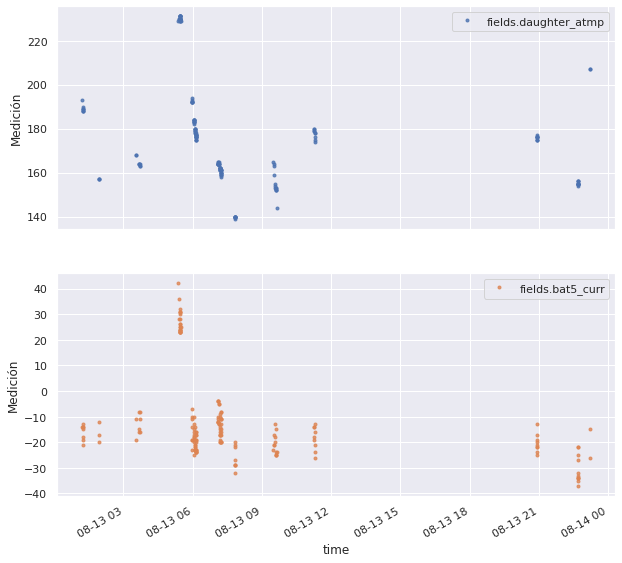

In [27]:
col_graf = ['fields.daughter_atmp', 'fields.bat5_curr'] 
ejes = undia[col_graf].plot(marker='.', alpha=0.8, linestyle='None',figsize=(10,10),subplots=True)
for eje in ejes:
  eje.set_ylabel('Medición')

Se observa que a modo de ejemplo, el día 13 de agosto de 2019, se registraron reiteradas mediciones con poco intervalos de tiempo. Esto se puede deber a que se le esté solicitando el envío al satélite, quizá verificando el funcionamiento de sistemas, o modificandolo y verificando el mismo. También se ve que por 9 horas, no se recibieron mediciones. Esto se puede deber a la órbita del satélite, o a que el satélite no transmite si no se lo encuesta. 

###Analizo la autocorrelación

In [108]:
autocorr_DaughterA = sm.tsa.acf (Dataset['fields.daughter_atmp'],nlags = 80)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


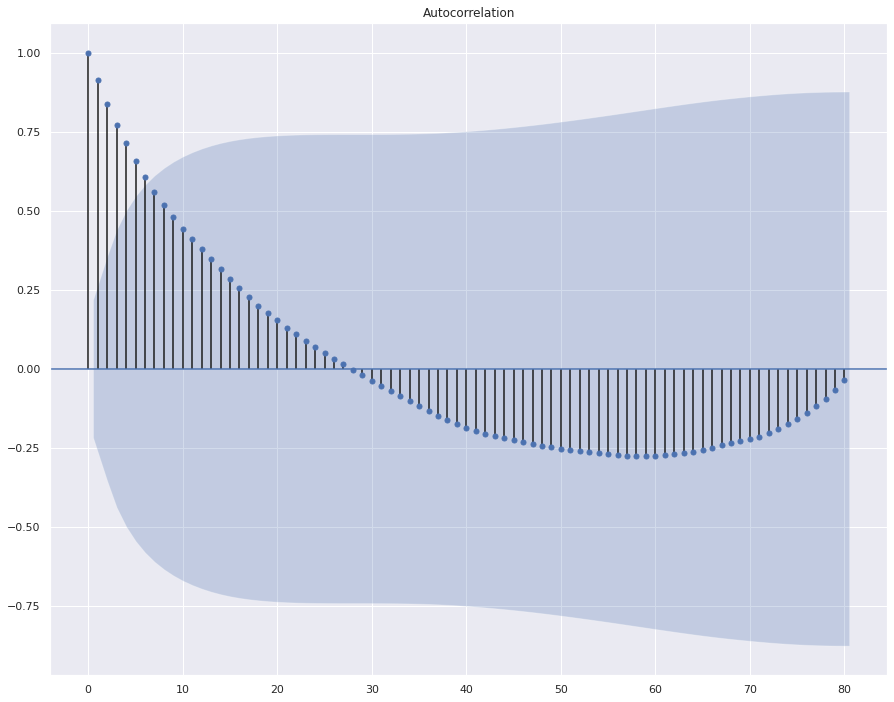

In [112]:
fig = tsaplots.plot_acf (autocorr_DaughterA, lags = 80)
plt.show ()

##Verifico si las series son estacionarias

Considerando que un satélite tiene una órbita estacionaria, es de esperar que las lecturas que este haga de temperatura, se vea afectada por su movimiento relativo a la tierra y al sol. A continuación, verificaré esto, realizando los test de Dickey-Fuller aumentado y KPSS. 

In [30]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [31]:
adf_test(Dataset['fields.daughter_atmp'])

Results of Dickey-Fuller Test:
Test Statistic                -8.827155e+00
p-value                        1.810544e-14
#Lags Used                     1.800000e+01
Number of Observations Used    3.898000e+03
Critical Value (1%)           -3.432029e+00
Critical Value (5%)           -2.862282e+00
Critical Value (10%)          -2.567165e+00
dtype: float64


>H0: La serie tiene al menos una raiz en 1 (No estacionaria)

>H1: La serie es estacionaria

Dado el alfa de 0,05 y el p-value de 1.81e-14 del test, se puede rechazar la hipótesis nula. Por lo tanto, y según el test Dickey-Fuller aumentado, la serie es estacionaria.

###Test KPSS

In [32]:
from statsmodels.tsa.stattools import kpss


def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [33]:
kpss_test(Dataset['fields.daughter_atmp'])

Results of KPSS Test:
Test Statistic            0.09422
p-value                   0.10000
Lags Used                36.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


> H0: La serie es estacionaria

> H1: La serie es no estacionaria (tiene al menos una raiz en 1)

Con base en el nivel de significancia de 0.05 y el valor p obtenido en el test KPSS, existe evidencia para no rechazar la hipótesis nula. Por lo tanto, la serie es estacionaria según la prueba KPSS.

Debido a que con ambos test se obtiene que la serie no tiene raiz alguna en 1, se concluye afirmando que la serie es estacionaria.

###Utilizando seasonal decompose

In [34]:
DaughtboardA = Dataset['fields.daughter_atmp'].resample('2D').mean()

In [35]:
DaughtboardA.name='Temperatura Daughtboard A'
DaughtboardA.head()

time
2019-08-10    161.527397
2019-08-12    176.983871
2019-08-14    180.601542
2019-08-16    174.070352
2019-08-18    142.108108
Freq: 2D, Name: Temperatura Daughtboard A, dtype: float64

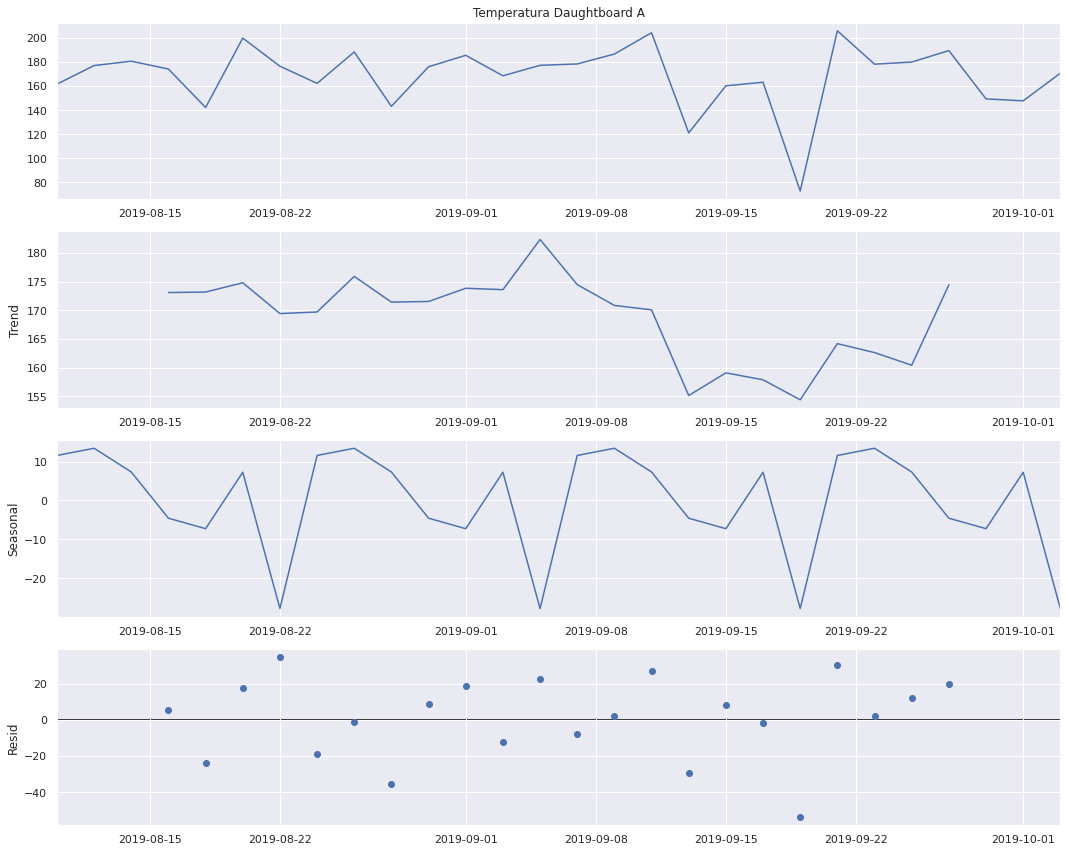

In [36]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 12
decomposition = sm.tsa.seasonal_decompose(DaughtboardA, model='additive')
fig = decomposition.plot()
plt.show()

In [37]:
Variable = Dataset['fields.gyro_py'].resample('2D').mean()

In [38]:
Variable.name='Variable'
Variable.head()

time
2019-08-10   -0.095890
2019-08-12    0.263441
2019-08-14   -0.061697
2019-08-16    0.296482
2019-08-18   -0.729730
Freq: 2D, Name: Variable, dtype: float64

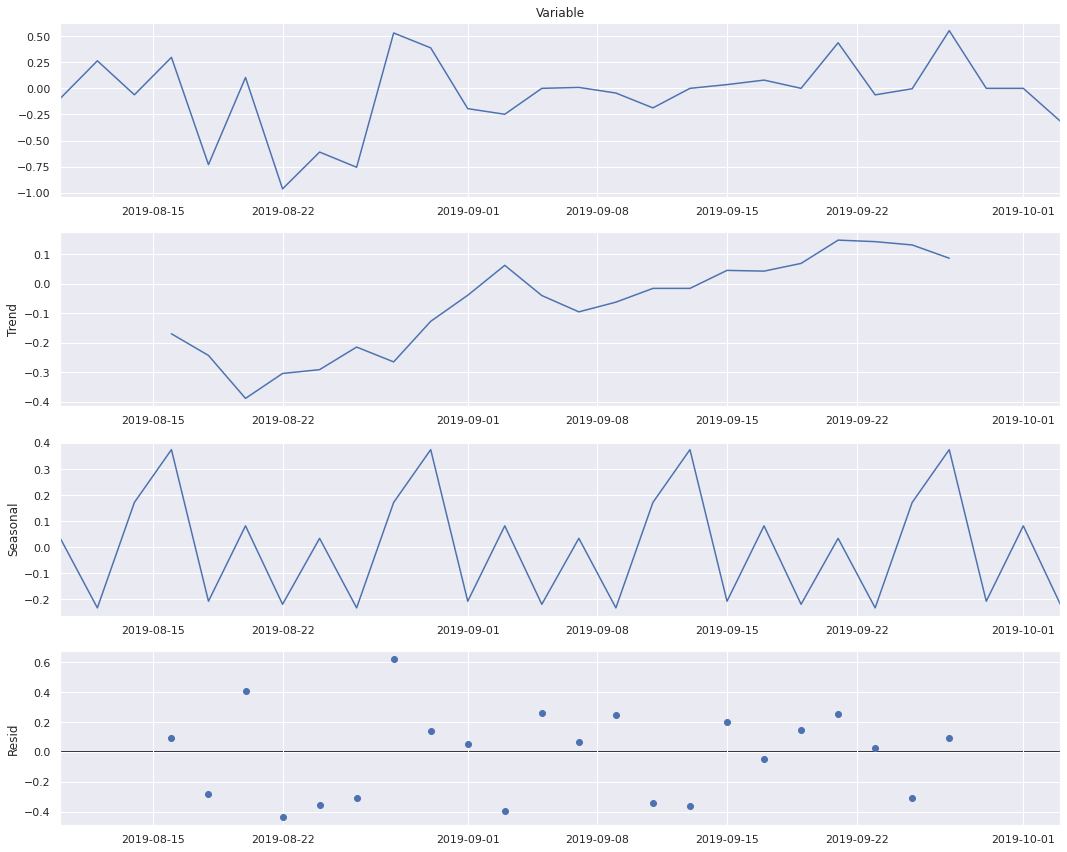

In [39]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 12
decomposition = sm.tsa.seasonal_decompose(Variable, model='additive')
fig = decomposition.plot()
plt.show()

In [40]:
basetimeH = pd.date_range('2019-08-09','2019-08-21',freq='H')                                        

In [41]:
muestra_tiempo = pd.to_datetime(['2019-08-10 06:31:21','2019-08-11 01:23:06','2019-08-13 22:41:22'])

In [42]:
nuevo_muestreo = diezdias.loc[muestra_tiempo,['fields.daughter_atmp']].copy()
frec_daughter = nuevo_muestreo.asfreq('H')
frec_daughter['Daughter A Temp - Datos llenos'] = nuevo_muestreo.asfreq('H', method='ffill')
#frec_daughter['Bat 5 curr - Datos llenos'] = nuevo_muestreo.asfreq('H', method='ffill')
frec_daughter

,fields.daughter_atmp,Daughter A Temp - Datos llenos
time,,
2019-08-10 06:31:21,149.0,149
2019-08-10 07:31:21,NaN,149
2019-08-10 08:31:21,NaN,149
2019-08-10 09:31:21,NaN,149
2019-08-10 10:31:21,NaN,149
...,...,...
2019-08-13 18:31:21,NaN,153
2019-08-13 19:31:21,NaN,153
2019-08-13 20:31:21,NaN,153


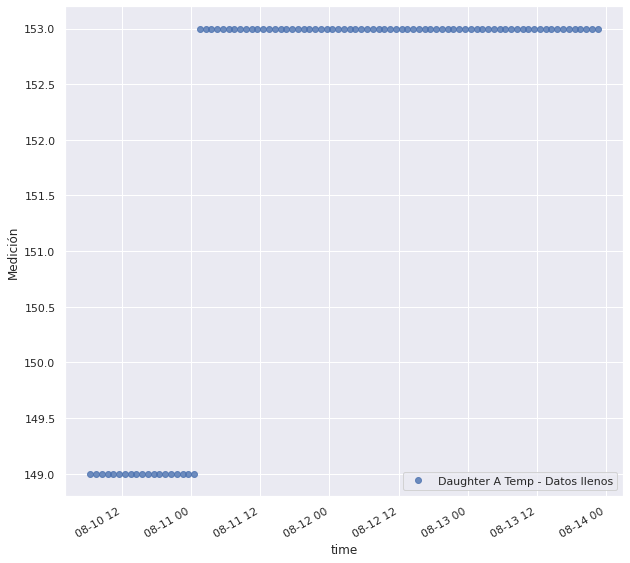

In [ ]:
col_graf = ['Daughter A Temp - Datos llenos'] 
ejes = frec_daughter[col_graf].plot(marker='o', alpha=0.8, linestyle='None',figsize=(10,10),subplots=True)
for eje in ejes:
  eje.set_ylabel('Medición')